Text(0.5, 1.0, 'Hamming Window zero extended')

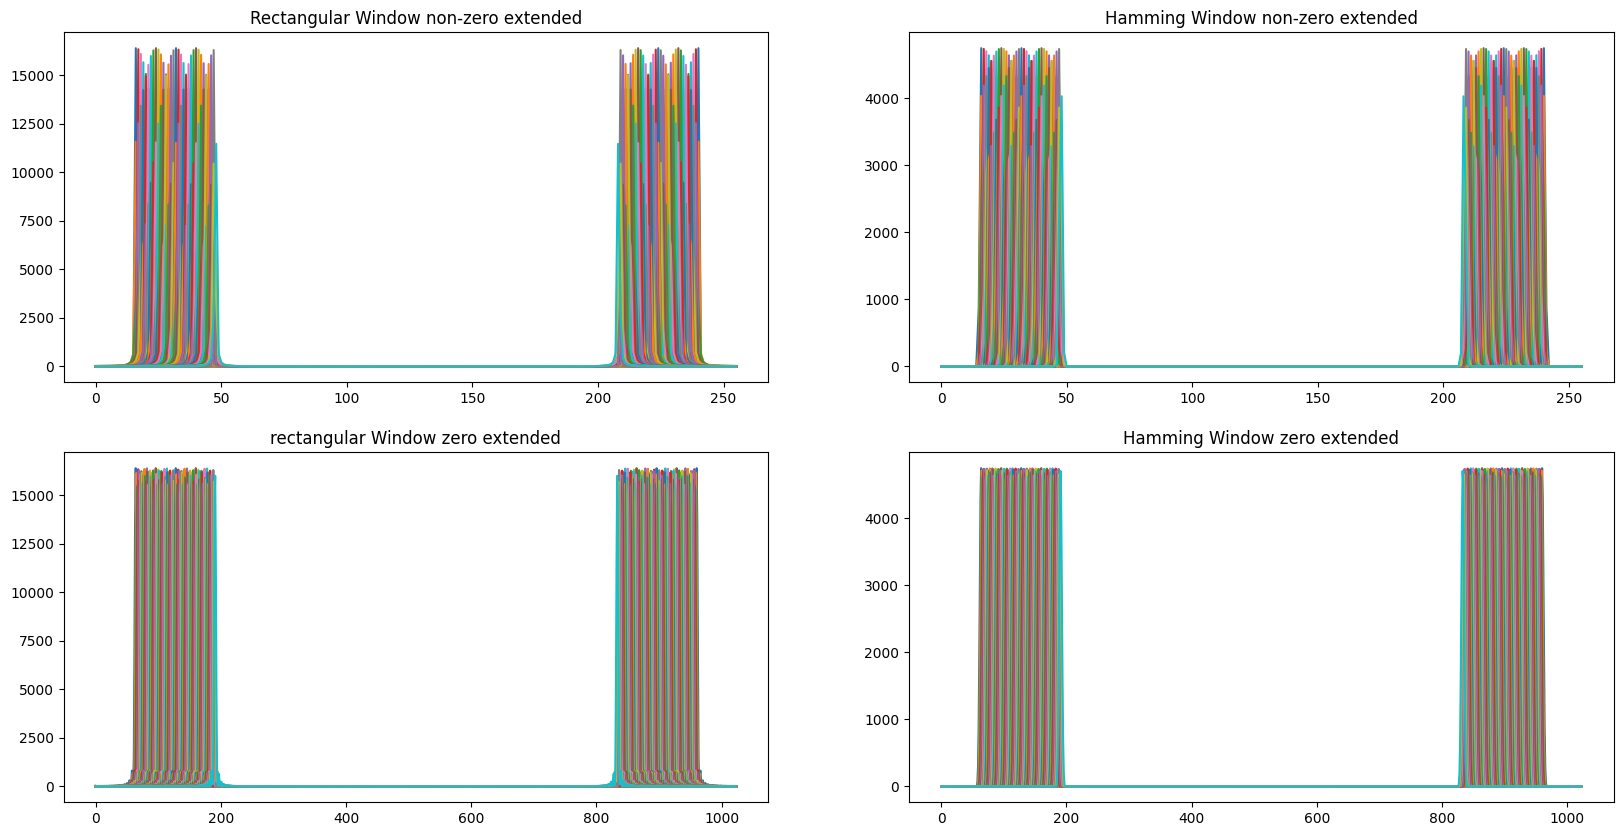

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
#%matplotlib inline      # Uncomment this to show figure in Jupyter Notebook

N = 256;                 # length of test signals
num_freqs = 100;         # number of frequencies to test

# Generate vector of frequencies to test
omega = np.pi/8 + np.linspace(0,num_freqs-1,num_freqs)/num_freqs*np.pi/4;

S1 = np.zeros([N,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.boxcar(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S1[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
                                                    # and store as a column of S

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(S1);                                        # plot all spectra on same graph
plt.title("Rectangular Window non-zero extended")


S2 = np.zeros([N,num_freqs]);                        # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.windows.hamming(N)                # use hamming window
    s = s*win;                                      # multiply input by window
    S2[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
                                                    # and store as a column of S

plt.subplot(2,2,2)
plt.plot(S2);  
plt.title("Hamming Window non-zero extended")



S3 = np.zeros([N*4,num_freqs]);                       # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.boxcar(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S3[:,i] = np.square(np.abs(np.fft.fft(s,1024)));      # generate magnitude of FFT
                                                    # and store as a column of S

plt.subplot(2,2,3)
plt.plot(S3);  
plt.title("rectangular Window zero extended")


S4 = np.zeros([N*4,num_freqs]);                       # matrix to hold FFT results

for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.windows.hamming(N)                 # use rectangular window
    s = s*win;                                    # multiply input by window
    S4[:,i] = np.square(np.abs(np.fft.fft(s,n = 1024)));      # generate magnitude of FFT
                                                    # and store as a column of S

plt.subplot(2,2,4)
plt.plot(S4);  
plt.title("Hamming Window zero extended")








### ANSWER 1
  For rectangular window we have larger side lobe height and smaller main lobe width versus hamming window where we have smaller side lobe height and higher main lobe width  
  
  Since the DFT is sampling the DTFT by the number of samples in our signal, zero padding gives better resolution to the DFT since we get more samples of the DTFT. The tradeoff is computation time
    
  Nothing comes for free. We can't decrease mainlobe width and sidelobe height athe same time and we can't get more samples of the DTFT in our DFT without taking the FFT of a longer signal.

Text(0, 0.5, 'magnitude')

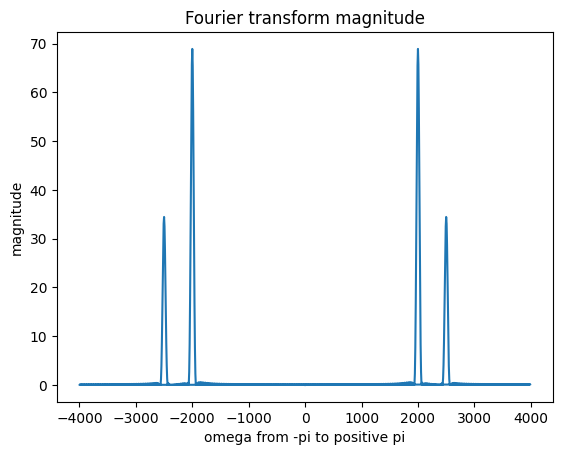

In [15]:
from IPython.display import Audio

fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 2000       # Tune Frequency is 600Hz
tune1 = np.sin(2*np.pi*freq*t)
freq = 2500
tune2 = 1/2* np.sin(2*np.pi*freq*t)
# To listen to it, you can use:

sum = (tune1+tune2)[:256]
sum = sum * signal.windows.hamming(len(sum))
Audio(sum,rate=fs)
fourier = np.abs(np.fft.fft(sum,n=1024))
# print(len(fourier))
w = 2*np.pi*(np.fft.fftfreq(len(fourier)))
analog = fs * w /2/np.pi
plt.plot(analog,fourier); 
plt.title("Fourier transform magnitude")
plt.xlabel("omega from -pi to positive pi")
plt.ylabel("magnitude")

In [16]:
Audio(tune1+tune2,rate=fs)

### ANSWER 2
The best Method to resolve the frequencies is using the rectangular window and zero padding to 1024. This allows us to resolve a difference of roughly 10hz in the analog signals.   
  We got worse performance with the hamming window since the signals are already so close. When the signals are over 50hz apart the hamming windo works pretty well.

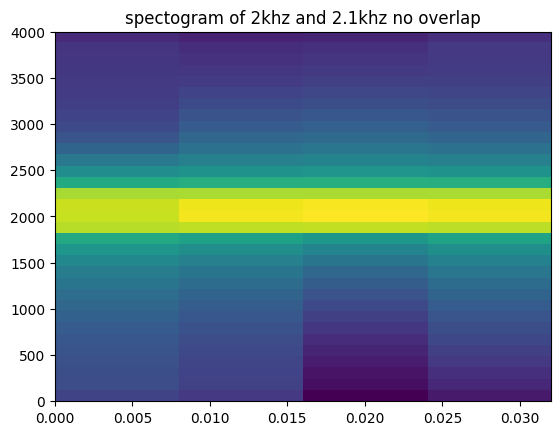

In [4]:

import numpy as np
from IPython.display import Audio
from scipy import signal

chirptime = np.linspace(0,0.5,4001)
chirp = signal.chirp(t,1000,0.5,5000);    # Frequency-sweep that goes from 1000 Hz to 5000 Hz in 0.5 seconds



fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 2000       # Tune Frequency is 600Hz
tune1 = np.sin(2*np.pi*freq*t)
freq = 2100
tune2 = np.sin(2*np.pi*freq*t)
# To listen to it, you can use:

sum = (tune1+tune2)[:256]
plt.specgram(sum, Fs = fs, noverlap=0,  NFFT= 64) 
plt.title("spectogram of 2khz and 2.1khz no overlap")
  
plt.show()



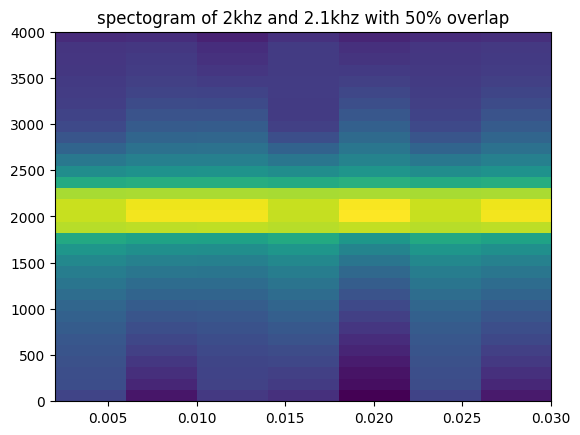

In [5]:
sum = (tune1+tune2)[:256]
plt.specgram(sum, Fs = fs, noverlap=32,  NFFT= 64) 
plt.title("spectogram of 2khz and 2.1khz with 50% overlap")
  
plt.show()

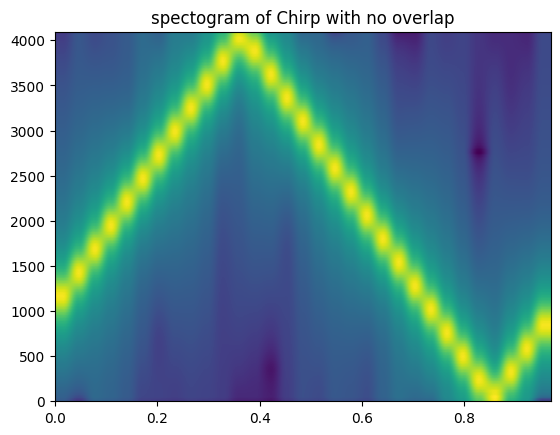

In [6]:
plt.specgram(chirp, Fs = 8192, noverlap= 0) 
plt.title('matplotlib.pyplot.specgram() Example\n',
          fontsize = 14, fontweight ='bold')

plt.title("spectogram of Chirp with no overlap")
plt.show()

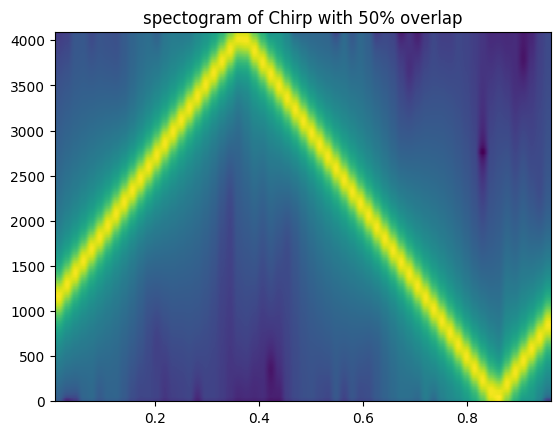

In [7]:
plt.specgram(chirp, Fs = 8192, NFFT= 256, noverlap= 128) 

plt.title("spectogram of Chirp with 50% overlap")
plt.show()

### ANSWER 3  
Having overlap allows us to see a smoother change in the frequency as we travel across the time axis for the chirp. It also provide more time intervals.  
  
  At .4 seconds in the chirp spectogram we begin to witness aliasing as the chirp signal reaches a higher frequency than our sampling frequency can handle.